# Variability of dissolved inorganic carbon in the largest karst estuarine lagoon system of the southern Gulf of Mexico

### José Andrés Martínez-Trejo<sup>1</sup>, Jose-Gilberto Cardoso-Mohedano<sup>2,*</sup>, Joan Albert Sanchez-Cabeza<sup>3</sup>, José Martin Hernández Ayón<sup>4</sup>, Ana Carolina Ruiz-Fernández<sup> 3 </sup>, Mario Alejandro Gómez-Ponce <sup>2</sup> , Linda Barranco-Servín<sup>5</sup>, Daniel Pech<sup>5</sup>

<sup> 1 </sup> Posgrado en Ciencias del Mar y Limnología, Universidad Nacional Autónoma de México; Avenida Ciudad Universitaria 3000, C.P. 04510, Coyoacán, Ciudad de México, México

<sup> 2 </sup>  Estación el Carmen, Instituto de Ciencias del Mar y Limnología, Universidad Nacional Autónoma de México, Carretera Carmen-Puerto Real km. 9.5, 24157 Ciudad del Carmen, Campeche, México

<sup> 3 </sup>  Unidad Académica Mazatlán, Instituto de Ciencias del Mar y Limnología, Universidad Nacional Autónoma de México, Calzada Joel Montes Camarena s/n, Colonia Playa Sur, Mazatlán 82000, Sinaloa, México

<sup> 4 </sup>  Instituto de Investigaciones Oceanológicas, Universidad Autónoma de Baja California, Km. 103 CarreteraTijuana-Ensenada, Ensenada, Baja California, México

<sup> 5 </sup> Laboratorio de Biodiversidad Marina y Cambio Climático (BIOMARCCA), El Colegio de la Frontera Sur, Lerma, Campeche, México. 

 \*Corresponding Author: gcardoso@cmarl.unam.mx Phone:+52-938-38-31847

[doi:XXXXX](https://XXXX)


- Raw data are aviable in: 

https://metadata.icmyl.unam.mx/bitstream/handle/20.500.12201/11367/MartinezTrejo_etal_2023_TA_DIC_RawData.csv?sequence=1&isAllowed=y



- Read csv  data file

In [1]:
# Import packages
import pandas as pd
import PyCO2SYS as pyco2
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import shapiro

In [2]:
# Function to read in csv file
def read_csv(file):
    """
    Read in csv file and return pandas dataframe
    """
    df = pd.read_csv(file, sep=",", header=0,  decimal=".", encoding='utf-8')
    return df

In [3]:
# define file path 
terminos_ta_dic_data_path = "../data/MartinezTrejo_etal_2023_TA_DIC_RawData.csv"

# Read in data
terminos_ta_dic_data = read_csv(terminos_ta_dic_data_path)

# Copy data to new dataframe
terminos_ta_dic = terminos_ta_dic_data.copy()

### Calculate DIC / TA ratio 

In [4]:
# Calculate the ratio of DIC to TA
terminos_ta_dic["DIC/TA"]= terminos_ta_dic["DIC_micromol_kg"]/terminos_ta_dic["TA_micromol_kg"]

## PyCO2SYS configuration from estuarine waters (Humphreys et al. 2022)

In [5]:
# Copy data to new dataframe
terminos_inorganic_carbon = terminos_ta_dic.copy()

# Create dictionary with data configuration for PyCO2SYS. 
# For more information on the parameters see Humphreys et al (2022)
my_co2sys_params_dic_ta_config = {
    # DIC measured in the lab in μmol/kg-sw
    "par1": terminos_inorganic_carbon["DIC_micromol_kg"],
    # TA measured in the lab, Total scale
    "par2": terminos_inorganic_carbon["TA_micromol_kg"],
    "par1_type": 2,         # tell PyCO2SYS: "par2 is a DIC value"
    "par2_type": 1,         # tell PyCO2SYS: "par1 is a TA value"
    # Fields conditions
    "salinity": terminos_inorganic_carbon["Sal_psu"],  # in-situ salinity in PSU
    # in-situ temperature (output conditions) in °C
    "temperature_out": terminos_inorganic_carbon["Temp_C"],
    "pressure_out": 0.0,
    # Settings
    "opt_pH_scale": 1,     # Total pH (Wolf-Gladrow et al. 2007)
    "opt_k_carbonic": 15,     # 0 < T < 50 °C, 1 < S < 50, Seawater scale, real seawater (Millero F.J. 2010)
    "temperature": 25      # lab temperature (input conditions) in °C
}

### Run PyCO2SYS

In [6]:
# Run PyCO2SYS to calculate the carbonate system parameters
terminos_inorganic_carbon_results= pyco2.sys(**my_co2sys_params_dic_ta_config)

### Read the interes variables from PYCO2sys 

In [7]:
# Select variables of interest from the PyCO2SYS output and create a DataFrame
pyco2_interest_variables = pd.DataFrame({
       "pH": terminos_inorganic_carbon_results["pH"],
       "saturation_aragonite": terminos_inorganic_carbon_results["saturation_aragonite"],
       "pCO2_atm": terminos_inorganic_carbon_results["pCO2_out"],
       "k_aragonite": terminos_inorganic_carbon_results["k_aragonite"],
       "total_calcium": terminos_inorganic_carbon_results["total_calcium"],
       "carbonate": terminos_inorganic_carbon_results["carbonate"],
       "CO3": terminos_inorganic_carbon_results["CO3"]
       
})

# Concatenate PyCO2SYS output with the original dataframe
CarbonateTL = pd.concat([terminos_ta_dic, pyco2_interest_variables], axis=1)

- Terminos Lagoon TA and DIC in TL mean and standard deviation 

In [8]:
CarbonateTL[['TA_micromol_kg', 'DIC_micromol_kg']].agg(['mean', 'std'])

,TA_micromol_kg,DIC_micromol_kg
mean,2885.127451,2808.019608
std,459.737994,506.347843


- Variables by season, mean and standard deviation 

In [9]:
grouped_data_season = CarbonateTL.groupby("Season")[['TA_micromol_kg','DIC_micromol_kg', 'pCO2_atm', 'pH', 'saturation_aragonite']].agg(['min', 'mean', 'std'])
print(grouped_data_season)

       TA_micromol_kg                          DIC_micromol_kg               \
                  min         mean         std             min         mean   
Season                                                                        
Dry              2500  3067.536232  445.474881            2289  2957.318841   
Rainy            2357  2503.727273  153.764282            2152  2495.848485   

                      pCO2_atm                                  pH            \
               std         min         mean          std       min      mean   
Season                                                                         
Dry     527.822260  513.431048  1590.333988  1180.278933  7.389057  7.856915   
Rainy   262.008244  604.804682  2603.863745  2368.545972  7.283040  7.722166   

                 saturation_aragonite                      
             std                  min      mean       std  
Season                                                     
Dry     0.208738       

- Select Candelaria and Palizada results

In [10]:
CandelariaResult = CarbonateTL.loc[CarbonateTL["Estuary"] == "Candelaria"]
                     
PalizadaResult = CarbonateTL.loc[CarbonateTL["Estuary"] == "Palizada"]

- TA vs DIC Perform  least squares (OLS) regression

In [11]:
#define predictor and response variables
x = CarbonateTL['TA_micromol_kg']
y = CarbonateTL['DIC_micromol_kg']

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()



#view model summary
print(model.summary())

# export model summary to text file
with open('../output_files/TA_DIC_liner_model_summary.txt', 'w') as file:
    file.write(model.summary().as_text())

                            OLS Regression Results                            
Dep. Variable:        DIC_micromol_kg   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     1222.
Date:                Wed, 17 Apr 2024   Prob (F-statistic):           7.26e-58
Time:                        15:15:45   Log-Likelihood:                -647.75
No. Observations:                 102   AIC:                             1299.
Df Residuals:                     100   BIC:                             1305.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -247.0395     88.497     -2.

- TA vas DIC linear Equation

In [12]:

linear_params = model.params

standard_errors = model.bse

Lintercep = f" {linear_params.iloc[0]:.0f}( \pm {standard_errors.iloc[0]:.0f})"

LSlope = f"{linear_params.iloc[1]:.2f}( \pm {standard_errors.iloc[1]:.2f})"

linearEquation= f"$y = {LSlope} \cdot x{Lintercep}$"


print("linear Equation" + linearEquation)

Rsquared = f"$r^{2}$ = {model.rsquared:.3f}"

linear Equation$y = 1.06( \pm 0.03) \cdot x -247( \pm 88)$


- TA vs DIC , scatter plot  with linear regretion

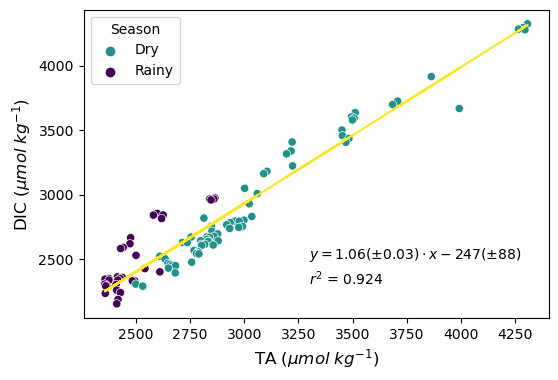

In [13]:

x = CarbonateTL['TA_micromol_kg']
y = CarbonateTL['DIC_micromol_kg']

# Plot 
g = sns.scatterplot(
    data=CarbonateTL,
    x="TA_micromol_kg", y="DIC_micromol_kg", hue="Season",
    palette=dict(Dry="#21918c", Rainy="#440154")
)

# Add labels and title
plt.xlabel('TA ($\mu mol  \; kg^{-1}$)', fontsize = 12)

plt.ylabel('DIC ($\mu mol  \; kg^{-1}$)', fontsize = 12)

# Calculate the linear regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Plot linear regression 

plt.plot(x, intercept + slope*x, '#fde725')

# set the figure size
plt.gcf().set_size_inches(6, 4)



plt.text(3300, 2500, linearEquation)

plt.text(3300, 2300, Rsquared)


# save the plot as a PDF file paper format  
plt.savefig('../output_files/DIC_TA.pdf', dpi=300, bbox_inches='tight')

plt.show()


-Salinity  vs DIC , scatter plot  with linear regretion

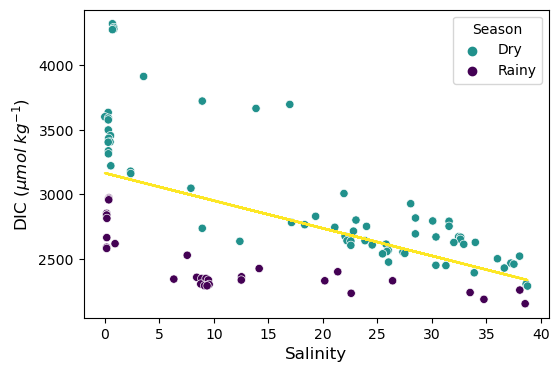

r-squared: 0.3228084313475949
Intercept: 3165.3264755206874
Slope: -21.39938964424291


In [14]:
import matplotlib.pyplot as plt
from scipy import stats

x = CarbonateTL['Sal_psu']
y = CarbonateTL['DIC_micromol_kg']
import seaborn as sns



# Plot sepal width as a function of sepal_length across days
g = sns.scatterplot(
    data=CarbonateTL,
    x="Sal_psu", y="DIC_micromol_kg", hue="Season",
    palette=dict(Dry="#21918c", Rainy="#440154")
)


#plt.scatter(x, y, label='original data', color = "#3b528b")

# Add labels and title
plt.xlabel('Salinity', fontsize = 12)

plt.ylabel('DIC ($\mu mol  \; kg^{-1}$)', fontsize = 12)

# Calculate the linear regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Plot linear regression 

plt.plot(x, intercept + slope*x, '#fde725')

# set the figure size
plt.gcf().set_size_inches(6, 4)

# save the plot as a PDF file paper format 
plt.savefig('../output_files/SAL_DIC.tiff', dpi=300, bbox_inches='tight')

plt.show()

# Print linear regression results 

print("r-squared:", r_value**2)
print("Intercept:", intercept)
print("Slope:", slope)

-Salinity vs DIC ,  Perform  least squares (OLS) regression

In [15]:
import statsmodels.api as sm

#define predictor and response variables
x = CarbonateTL['Sal_psu']
y = CarbonateTL['DIC_micromol_kg']

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

# export model summary to text file
with open('../output_files/Sal_DIC_liner_model_summary.txt', 'w') as file:
    file.write(model.summary().as_text())

                            OLS Regression Results                            
Dep. Variable:        DIC_micromol_kg   R-squared:                       0.323
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     47.67
Date:                Wed, 17 Apr 2024   Prob (F-statistic):           4.71e-10
Time:                        15:15:50   Log-Likelihood:                -759.53
No. Observations:                 102   AIC:                             1523.
Df Residuals:                     100   BIC:                             1528.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3165.3265     66.313     47.733      0.0

-Salinity  vs TA , scatter plot  with linear regretion

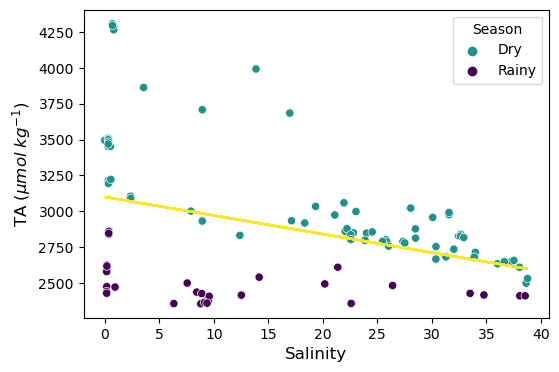

r-squared: 0.142669985748218
Intercept: 3100.800893344719
Slope: -12.916852281816311


In [16]:
import matplotlib.pyplot as plt
from scipy import stats

x = CarbonateTL['Sal_psu']
y = CarbonateTL['TA_micromol_kg']
import seaborn as sns



# Plot sepal width as a function of sepal_length across days
g = sns.scatterplot(
    data=CarbonateTL,
    x="Sal_psu", y="TA_micromol_kg", hue="Season",
    palette=dict(Dry="#21918c", Rainy="#440154")
)


#plt.scatter(x, y, label='original data', color = "#3b528b")

# Add labels and title
plt.xlabel('Salinity', fontsize = 12)

plt.ylabel('TA ($\mu mol  \; kg^{-1}$)', fontsize = 12)

# Calculate the linear regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Plot linear regression 

plt.plot(x, intercept + slope*x, '#fde725')

# set the figure size
plt.gcf().set_size_inches(6, 4)

# save the plot as a PDF file paper format 
plt.savefig('../output_files/SAL_TA.tiff', dpi=300, bbox_inches='tight')

plt.show()

# Print linear regression results 

print("r-squared:", r_value**2)
print("Intercept:", intercept)
print("Slope:", slope)

-Salinity vs TA ,  Perform  least squares (OLS) regression

In [17]:
import statsmodels.api as sm

#define predictor and response variables
x = CarbonateTL['Sal_psu']
y = CarbonateTL['TA_micromol_kg']

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

# export model summary to text file
with open('../output_files/Sal_TA_liner_model_summary.txt', 'w') as file:
    file.write(model.summary().as_text())

                            OLS Regression Results                            
Dep. Variable:         TA_micromol_kg   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     16.64
Date:                Wed, 17 Apr 2024   Prob (F-statistic):           9.09e-05
Time:                        15:15:52   Log-Likelihood:                -761.71
No. Observations:                 102   AIC:                             1527.
Df Residuals:                     100   BIC:                             1533.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3100.8009     67.745     45.771      0.0

Plot DIC/TA ratio,  Salinity and pH by Estuary 

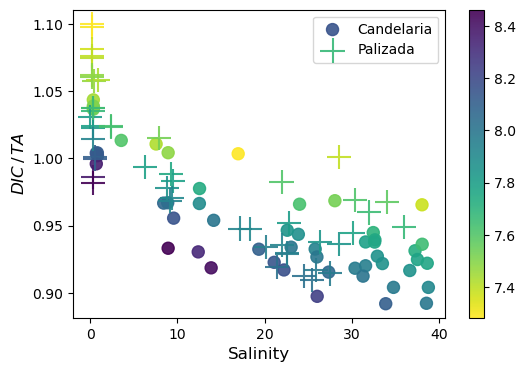

In [18]:
# Create the scatter plot 

# getting the original colormap using cm.get_cmap() function
orig_map = plt.colormaps.get_cmap('viridis')

# reversing the original colormap using reversed() function
reversed_map = orig_map.reversed()

scatter = plt.scatter(
    x=CandelariaResult["Sal_psu"], y=CandelariaResult["DIC_micromol_kg"]/CandelariaResult["TA_micromol_kg"], c=CandelariaResult["pH"], cmap=reversed_map,
    marker='.', s= 300, label='Candelaria', alpha=0.9)


scatter = plt.scatter(
    x=PalizadaResult["Sal_psu"], y=PalizadaResult["DIC_micromol_kg"] / PalizadaResult["TA_micromol_kg"], c=PalizadaResult["pH"], cmap=reversed_map,
    marker='+', s= 300, label='Palizada', alpha=0.9)


# Add a color bar
plt.colorbar(scatter)


# Add labels and title
plt.xlabel('Salinity', fontsize = 12)
plt.ylabel("$DIC \, / \, TA $" , fontsize = 12)
plt.legend(loc='upper right')

# set the figure size
plt.gcf().set_size_inches(6, 4)

# save the plot as a PDF file
plt.savefig('../output_files/sal_DICTA_pH.pdf', dpi=300, bbox_inches='tight')

# display the plot
plt.show()



# References
- Humphreys, M. P., Lewis, E. R., Sharp, J. D., & Pierrot, D. (2022). PyCO2SYS v1.8: Marine carbonate system calculations in Python. Geoscientific Model Development, 15(1), 15–43. https://doi.org/10.5194/gmd-15-15-2022
- Millero, F. J. (2010). Carbonate constants for estuarine waters. Marine and Freshwater Research, 61(2), 139. https://doi.org/10.1071/MF09254
- Wolf-Gladrow, D. A., Zeebe, R. E., Klaas, C., Körtzinger, A., & Dickson, A. G. (2007). Total alkalinity: The explicit conservative expression and its application to biogeochemical processes. Marine Chemistry, 106(1–2), 287–300. https://doi.org/10.1016/j.marchem.2007.01.006

In [19]:
type(terminos_inorganic_carbon_results)

dict

In [21]:
for key in terminos_inorganic_carbon_results.keys():
    print(key)

par1
par1_type
par2
par2_type
alkalinity
dic
opt_k_bisulfate
opt_k_carbonic
opt_k_fluoride
opt_total_borate
opt_gas_constant
opt_pH_scale
opt_buffers_mode
salinity
temperature
pressure
total_ammonia
total_borate
total_calcium
total_fluoride
total_phosphate
total_silicate
total_sulfate
total_sulfide
peng_correction
gas_constant
total_alpha
total_beta
pressure_atmosphere
pressure_atmosphere_out
opt_pressured_kCO2
opt_adjust_temperature
opt_which_fCO2_insitu
bh_upsilon
pH
pCO2
fCO2
bicarbonate
carbonate
aqueous_CO2
xCO2
alkalinity_borate
hydroxide
alkalinity_phosphate
alkalinity_silicate
alkalinity_ammonia
alkalinity_sulfide
hydrogen_free
revelle_factor
saturation_calcite
saturation_aragonite
pH_total
pH_sws
pH_free
pH_nbs
gamma_dic
beta_dic
omega_dic
gamma_alk
beta_alk
omega_alk
isocapnic_quotient
isocapnic_quotient_approx
psi
substrate_inhibitor_ratio
alkalinity_alpha
alkalinity_beta
HCO3
CO3
CO2
BOH4
BOH3
OH
Hfree
H3PO4
H2PO4
HPO4
PO4
H3SiO4
H4SiO4
NH3
NH4
HS
H2S
HSO4
SO4
HF
F
alpha
al

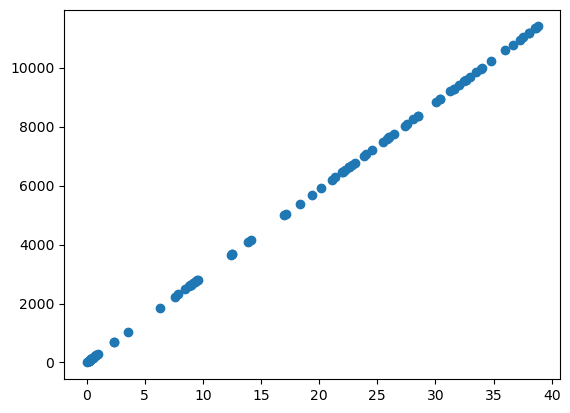

In [22]:
plt.scatter(terminos_inorganic_carbon_results["salinity"], terminos_inorganic_carbon_results["total_calcium"])

<Axes: xlabel='total_calcium', ylabel='saturation_aragonite'>

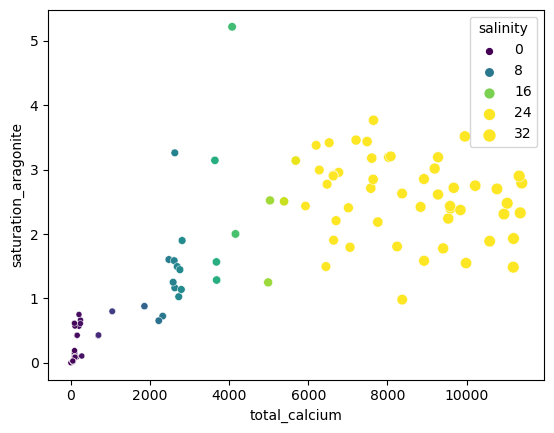

In [23]:

sns.scatterplot(data=terminos_inorganic_carbon_results, x="total_calcium", y="saturation_aragonite", hue="salinity", size= "salinity",  palette="viridis",  hue_norm=(0, 20))

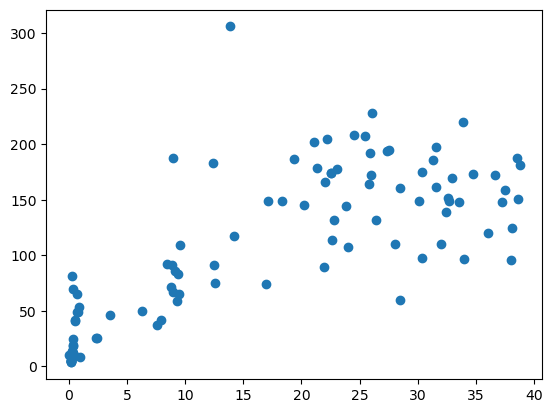

In [24]:
plt.scatter(terminos_inorganic_carbon_results["salinity"], terminos_inorganic_carbon_results["carbonate"])

In [25]:
import numpy as np

# Assuming you have two arrays total_calcium and saturation_aragonite
total_calcium = np.array(terminos_inorganic_carbon_results["total_calcium"])
saturation_aragonite = np.array(terminos_inorganic_carbon_results["saturation_aragonite"])

# Calculate the coefficients of the linear relationship
coefficients = np.polyfit(total_calcium, saturation_aragonite, 1)

# coefficients is an array where the first element is the slope and the second element is the y-intercept
slope, intercept = coefficients

print(f"The equation of the linear relationship is: y = {slope} * x + {intercept}")

# Calculate the correlation coefficient
correlation_matrix = np.corrcoef(total_calcium, saturation_aragonite)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print(f"The R-squared value is: {r_squared}")

The equation of the linear relationship is: y = 0.00023123447711148807 * x + 0.5696064866508209
The R-squared value is: 0.5746220521037216


In [26]:
# Assuming you have two arrays total_calcium and saturation_aragonite
import numpy as np

total_calcium = np.array(terminos_inorganic_carbon_results["total_calcium"])
saturation_aragonite = np.array(terminos_inorganic_carbon_results["saturation_aragonite"])

segment_value = 7300

# Segment the data into two sections
mask = total_calcium <= segment_value
total_calcium_1 = total_calcium[mask]
saturation_aragonite_1 = saturation_aragonite[mask]

mask = total_calcium > segment_value
total_calcium_2 = total_calcium[mask]
saturation_aragonite_2 = saturation_aragonite[mask]

# Calculate the coefficients of the linear relationship for each section
coefficients_1 = np.polyfit(total_calcium_1, saturation_aragonite_1, 1)
coefficients_2 = np.polyfit(total_calcium_2, saturation_aragonite_2, 1)

# coefficients is an array where the first element is the slope and the second element is the y-intercept
slope_1, intercept_1 = coefficients_1
slope_2, intercept_2 = coefficients_2

# Calculate the correlation coefficient for each section
correlation_matrix_1 = np.corrcoef(total_calcium_1, saturation_aragonite_1)
correlation_xy_1 = correlation_matrix_1[0,1]
r_squared_1 = correlation_xy_1**2

correlation_matrix_2 = np.corrcoef(total_calcium_2, saturation_aragonite_2)
correlation_xy_2 = correlation_matrix_2[0,1]
r_squared_2 = correlation_xy_2**2

print(f"The R-squared value for total_calcium <= {segment_value} is: {r_squared_1}")
print(f"The R-squared value for total_calcium > {segment_value}  is: {r_squared_2}")

The R-squared value for total_calcium <= 7300 is: 0.7158975909744342
The R-squared value for total_calcium > 7300  is: 0.08018744295291395


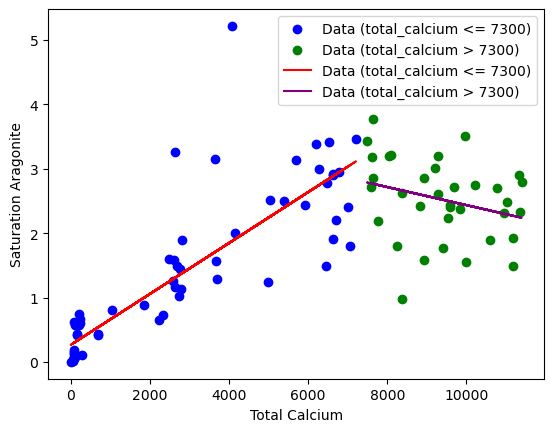

In [27]:
# Assuming you have two arrays total_calcium and saturation_aragonite
total_calcium = np.array(terminos_inorganic_carbon_results["total_calcium"])
saturation_aragonite = np.array(terminos_inorganic_carbon_results["saturation_aragonite"])

segment_value = 7300

# Segment the data into two sections
mask = total_calcium <= segment_value
total_calcium_1 = total_calcium[mask]
saturation_aragonite_1 = saturation_aragonite[mask]

mask = total_calcium > segment_value
total_calcium_2 = total_calcium[mask]
saturation_aragonite_2 = saturation_aragonite[mask]

# Calculate the coefficients of the linear relationship for each section
coefficients_1 = np.polyfit(total_calcium_1, saturation_aragonite_1, 1)
coefficients_2 = np.polyfit(total_calcium_2, saturation_aragonite_2, 1)

# Generate y-values based on the linear relationship for each section
y_values_1 = coefficients_1[0] * total_calcium_1 + coefficients_1[1]
y_values_2 = coefficients_2[0] * total_calcium_2 + coefficients_2[1]

# Plot the original data as scatter plot
plt.scatter(total_calcium_1, saturation_aragonite_1, color='blue', label= f'Data (total_calcium <= {segment_value})')
plt.scatter(total_calcium_2, saturation_aragonite_2, color='green', label=f'Data (total_calcium > {segment_value})')
# Plot the linear relationships
plt.plot(total_calcium_1, y_values_1, color='red', label=f'Data (total_calcium <= {segment_value})')
plt.plot(total_calcium_2, y_values_2, color='purple', label=f'Data (total_calcium > {segment_value})')

plt.xlabel('Total Calcium')
plt.ylabel('Saturation Aragonite')
plt.legend()
plt.show()

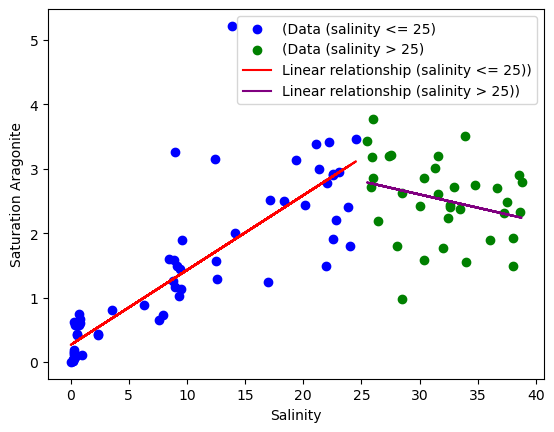

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have two arrays salinity and saturation_aragonite
salinity = np.array(terminos_inorganic_carbon_results["salinity"])
saturation_aragonite = np.array(terminos_inorganic_carbon_results["saturation_aragonite"])

mask_salinty_value = 25

# Segment the data into two sections
mask = salinity <= mask_salinty_value
salinity_1 = salinity[mask]
saturation_aragonite_1 = saturation_aragonite[mask]

mask = salinity > mask_salinty_value
salinity_2 = salinity[mask]
saturation_aragonite_2 = saturation_aragonite[mask]

# Calculate the coefficients of the linear relationship for each section
coefficients_1 = np.polyfit(salinity_1, saturation_aragonite_1, 1)
coefficients_2 = np.polyfit(salinity_2, saturation_aragonite_2, 1)

# Generate y-values based on the linear relationship for each section
y_values_1 = coefficients_1[0] * salinity_1 + coefficients_1[1]
y_values_2 = coefficients_2[0] * salinity_2 + coefficients_2[1]

# Plot the original data as scatter plot
plt.scatter(salinity_1, saturation_aragonite_1, color='blue', label=f"(Data (salinity <= {mask_salinty_value})")
plt.scatter(salinity_2, saturation_aragonite_2, color='green', label=f"(Data (salinity > {mask_salinty_value})")

# Plot the linear relationships
plt.plot(salinity_1, y_values_1, color='red', label=f"Linear relationship (salinity <= {mask_salinty_value}))")
plt.plot(salinity_2, y_values_2, color='purple', label=f"Linear relationship (salinity > {mask_salinty_value}))")

plt.xlabel('Salinity')
plt.ylabel('Saturation Aragonite')
plt.legend()
plt.show()

In [78]:
import numpy as np

# Assuming you have two arrays salinity and saturation_aragonite
salinity = np.array(terminos_inorganic_carbon_results["salinity"])
saturation_aragonite = np.array(terminos_inorganic_carbon_results["saturation_aragonite"])

mask_salinty_value = 25

# Segment the data into two sections
mask = salinity <= mask_salinty_value
salinity_1 = salinity[mask]
saturation_aragonite_1 = saturation_aragonite[mask]

mask = salinity > mask_salinty_value
salinity_2 = salinity[mask]
saturation_aragonite_2 = saturation_aragonite[mask]

# Calculate the correlation coefficient for each section
correlation_matrix_1 = np.corrcoef(salinity_1, saturation_aragonite_1)
correlation_xy_1 = correlation_matrix_1[0,1]
r_squared_1 = correlation_xy_1**2

correlation_matrix_2 = np.corrcoef(salinity_2, saturation_aragonite_2)
correlation_xy_2 = correlation_matrix_2[0,1]
r_squared_2 = correlation_xy_2**2

print(f"The R-squared value for salinity <= {mask_salinty_value} is: {r_squared_1}")
print(f"The R-squared value for salinity > {mask_salinty_value} is: {r_squared_2}")

The R-squared value for salinity <= 25 is: 0.7158975909744336
The R-squared value for salinity > 25 is: 0.08018744295291388


## Cambio de los revisores 

In [79]:
def convert_oxygen_concentration(oxygen_in_mg_per_L, salinity, temperature, pressure):
    """
    Convert oxygen concentration from mg/L to micromol/kg in seawater.

    Parameters:
    oxygen_in_mg_per_L (float): Oxygen concentration in mg/L
    salinity (float): Absolute Salinity in g/kg
    temperature (float): Conservative Temperature in degrees Celsius
    pressure (float): Sea pressure in dbar

    Returns:
    float: Oxygen concentration in micromol/kg
    """
    import gsw

    # Molecular weight of O2
    molecular_weight_O2 = 31.9988  # g/mol

    # Convert mg/L to mol/L
    oxygen_in_mol_per_L = oxygen_in_mg_per_L / (1000 * molecular_weight_O2)

    # Convert mol/L to micromol/L
    oxygen_in_micromol_per_L = oxygen_in_mol_per_L * 1e6

    # Calculate density of seawater in kg/L
    density_seawater = gsw.rho(salinity, temperature, pressure) / 1000  # kg/L

    # Convert micromol/L to micromol/kg
    oxygen_in_micromol_per_kg = oxygen_in_micromol_per_L / density_seawater

    return oxygen_in_micromol_per_kg

In [80]:
CarbonateTL["DO_micromol_kg"] = convert_oxygen_concentration(CarbonateTL["DO_mg_L"], CarbonateTL["Sal_psu"], CarbonateTL["Temp_C"], 0.0)

In [81]:
def calculate_aou(salinity, temperature, pressure, oxygen, latitude, longitude):
    """
    Calculate Apparent Oxygen Utilization (AOU).

    Parameters:
    salinity (float): Absolute Salinity in g/kg; 
    Practical Salinity Unit (PSU) is a unit based on the properties of seawater conductivity. 
    It's a dimensionless unit, but it's roughly equivalent to or grams per kilogram (g/kg)
    temperature (float): Conservative Temperature in degrees Celsius
    pressure (float): Sea pressure in dbar
    oxygen (float): Dissolved oxygen concentration in micromol/kg

    Returns:
    float: AOU in micromol/kg
    Reference:

    TEOS-10 Manual
    GSW-Python Documentation
    """
    import gsw

    # Calculate saturation concentration of oxygen in micromol/kg
    oxygen_sat = gsw.O2sol(salinity, temperature, pressure, latitude, longitude)

    # Calculate AOU
    aou = oxygen_sat - oxygen

    return aou


In [82]:
CarbonateTL["oxygen_utilization_micromol_kg"] =calculate_aou(CarbonateTL["Sal_psu"], CarbonateTL["Temp_C"],  0.0, CarbonateTL["DO_micromol_kg"], CarbonateTL["latitude"] , CarbonateTL["latitude"] )



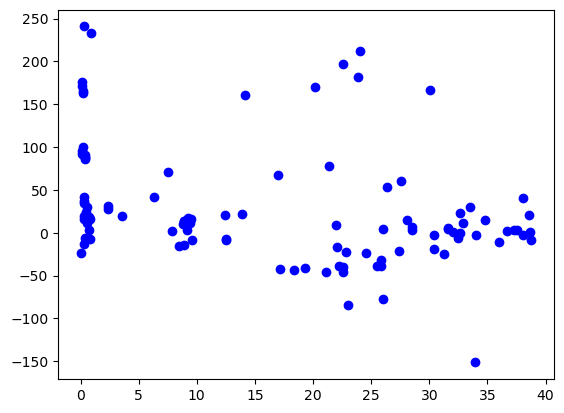

In [83]:
plt.plot(CarbonateTL["Sal_psu"], CarbonateTL["oxygen_utilization_micromol_kg"], 'o', color='blue')

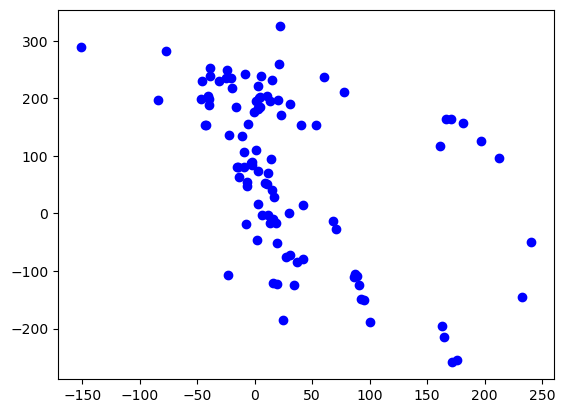

In [84]:
plt.plot(CarbonateTL["oxygen_utilization_micromol_kg"], CarbonateTL["TA_micromol_kg"]-CarbonateTL["DIC_micromol_kg"], 'o', color='blue')

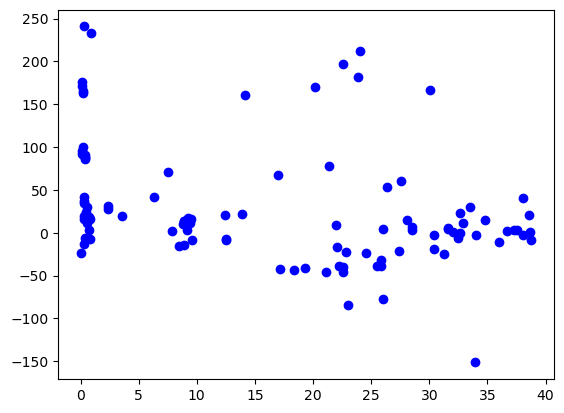

In [85]:
plt.plot(CarbonateTL["Sal_psu"] , CarbonateTL["oxygen_utilization_micromol_kg"], 'o', color='blue')